# Домашняя работа №1

## Разведочный анализ данных (EDA)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

### 1. Предварительный обзор данных

### Описание датасета

Датасет содержит информацию о клиентах с указанием их дохода, возраста, суммы кредита и отношения кредита к доходу, а также бинарный таргет Default, указывающий на факт дефолта по кредиту (1 — дефолт, 0 — нет).

Основные признаки:
- Income — годовой доход клиента.
- Age — возраст клиента.
- Loan — сумма кредита, который был предоставлен клиенту.
- Loan to Income — отношение суммы кредита к доходу клиента.
- Default — бинарный таргет, указывающий, попал ли клиент в дефолт (1 = дефолт, 0 = нет).

In [ ]:
df = pd.read_csv("Credit_Default.csv")
df

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1
...,...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0.032535,0
1996,69516.12757,23.162104,3503.176156,0.050394,0
1997,44311.44926,28.017167,5522.786693,0.124636,1
1998,43756.05660,63.971796,1622.722598,0.037086,0


In [4]:
df.isnull().sum()

Income            0
Age               0
Loan              0
Loan to Income    0
Default           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.3 KB


In [5]:
df.describe()

,Income,Age,Loan,Loan to Income,Default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,32796.459720,29.062492,1939.708847,0.047903,0.000000
50%,45789.117310,41.382673,3974.719418,0.099437,0.000000
75%,57791.281670,52.596993,6432.410625,0.147585,0.000000
max,69995.685580,63.971796,13766.051240,0.199938,1.000000


## 2. Анализ пропущенных значений

Пропущенных значений в датасете нет (анализ выше).

## 3. Построение диаграмм попарного распределения признаков

Text(0.5, 1.02, 'Диаграммы попарного распределения признаков')

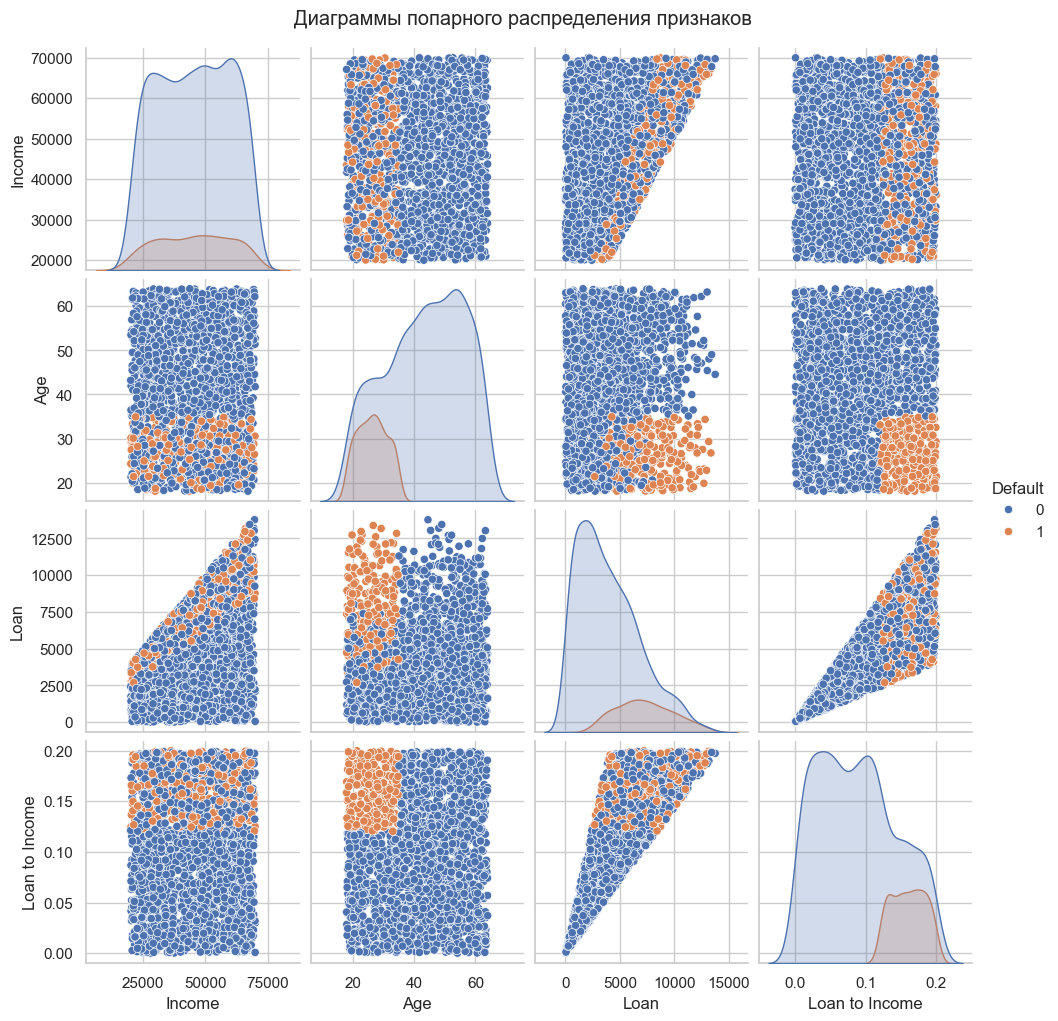

In [24]:
# Диаграммы попарного распределения признаков
sns.pairplot(df, hue='Default')
plt.suptitle('Диаграммы попарного распределения признаков', y=1.02)

Парные графики показывают, что каждый отдельный признак не совсем подходит для построения предсказаний, так как классы перекрывают друг друга. Но на графиках с комбинацией разных признаков можно определить почти четкие разделения между классами, что, безусловно, может положительно сказаться на обучении модели.

## 3. Корреляционный анализ

In [26]:
correlation_matrix = df.corr()
correlation_matrix

,Income,Age,Loan,Loan to Income,Default
Income,1.000000,-0.034984,0.441117,-0.019862,0.002284
Age,-0.034984,1.000000,0.006561,0.021588,-0.444765
Loan,0.441117,0.006561,1.000000,0.847495,0.377160
Loan to Income,-0.019862,0.021588,0.847495,1.000000,0.433261
Default,0.002284,-0.444765,0.377160,0.433261,1.000000


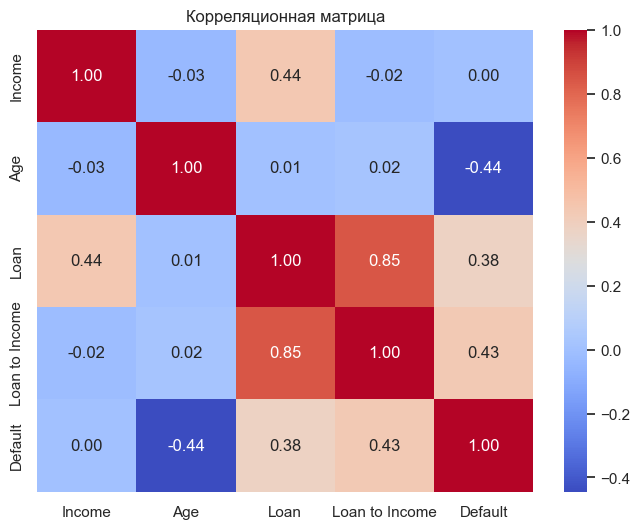

In [ ]:
# Корреляционный анализ
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

На визуализации матрицы корреляций можно наблюдать сильную положительную связь между "Income" и "Loan to Income" (0.85), что вполне ожидаемо, поскольку высокий доход обычно позволяет получать большие суммы кредитов. Корреляция переменной "Default" с другими признаками остается низкой, что свидетельствует о сложности в выявлении факторов, влияющих на вероятность дефолта. Кроме того, отрицательная корреляция между "Age" и "Default" (-0.44) может указывать на то, что с увеличением возраста вероятность дефолта снижается, что требует дополнительного исследования.

## 4. Анализ баланса классов

In [23]:
# Анализ баланса классов
class_distribution = df['Default'].value_counts()
print("\nРаспределение классов (дефолт/не дефолт):")
print(class_distribution)


Распределение классов (дефолт/не дефолт):
Default
0    1717
1     283
Name: count, dtype: int64


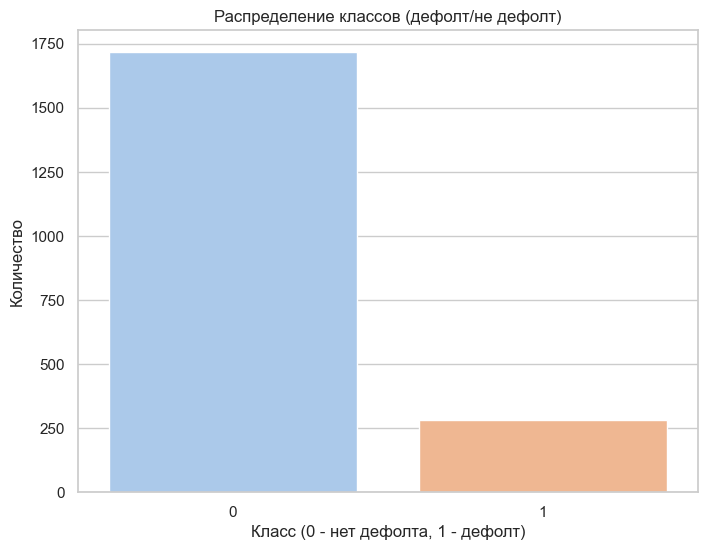

In [28]:
# Визуализация распределения классов
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, hue=class_distribution.index, palette='pastel', legend=False)
plt.title('Распределение классов (дефолт/не дефолт)')
plt.xlabel('Класс (0 - нет дефолта, 1 - дефолт)')
plt.ylabel('Количество')
#plt.xticks(rotation=45)
plt.show()

Классы в целевой переменной Default несбалансированы: больше клиентов не имели дефолта (класс 0). Нужно классы сбалансировать, иначе модель может быть предвзятой

### 6. Заключение и выводы

 - Данные сильно несбалансированны, что требует применения методов обработки дисбаланса, таких как увеличение классов, уменьшение или использование алгоритмов, устойчивых к несбалансированным данным (например, методы на основе деревьев).
 - Существует высокая положительная корреляция между доходом и коэффициентом займа на доход, что может быть полезно для разработки функций, но важно учитывать, что корреляция не означает причинность.
 - Визуализация парных графиков четко демонстрирует разделение между классами, что может помочь в выборе методов классификации.